In [1]:
# Setup and Import data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

url = 'F:\Education\BITS Pilani\Semester-4\R&D\data.csv'

df = pd.read_csv(url, parse_dates=['date'], index_col='date')
print(df)

                         value
date                          
2022-02-18 01:04:00   1.955278
2022-02-16 20:37:00   6.143889
2022-02-15 20:41:00   6.058056
2022-02-14 20:41:00  10.831111
2022-02-10 20:41:00   6.580278
...                        ...
2020-01-09 21:43:00   6.364167
2020-01-08 21:22:00   6.336111
2020-01-07 21:21:00   9.583611
2020-01-06 20:53:00   6.220556
2020-01-02 21:03:00   7.325000

[474 rows x 1 columns]


In [2]:
df = df.fillna(df.interpolate())

<AxesSubplot:xlabel='date'>

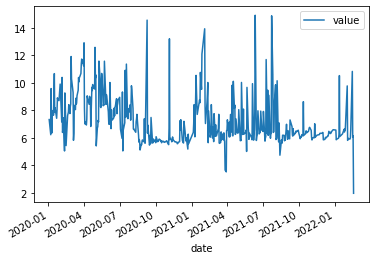

In [3]:
df.plot()

In [4]:
# extract the seasonality data
months = [x.month for x in df.index]
years = [x.year for x in df.index]
day = [x.day for x in df.index]
hour = [x.hour for x in df.index]
minute = [x.minute for x in df.index]
 
# convert into one matrix
X = np.array([day, months, years, hour, minute]).T

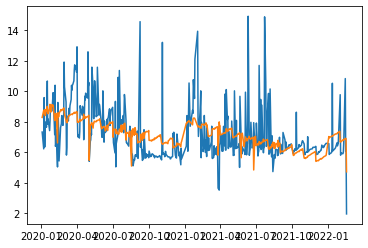

In [5]:
from sklearn.linear_model import LinearRegression
 
# fit the model
my_lr = LinearRegression()
my_lr.fit(X, df.value.values)
 
# predict on the same period
preds = my_lr.predict(X)
 
# plot what has been learned
plt.plot(df.index, df.value.values)
plt.plot(df.index, preds)

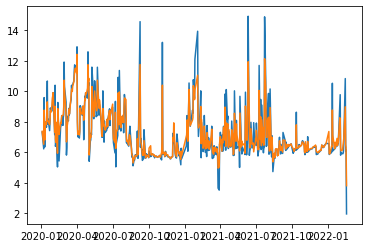

In [6]:
from sklearn.ensemble import RandomForestRegressor
 
# fit the model
my_rf = RandomForestRegressor()
my_rf.fit(X, df.value.values)
 
# predict on the same period
preds = my_rf.predict(X)
 
# plot what has been learned
plt.plot(df.index, df.value.values)
plt.plot(df.index, preds)

In [9]:
my_rf.predict([[22,2,2022, 7, 34]])

array([5.39651111])

In [10]:
import skl2onnx
from skl2onnx.common.data_types import FloatTensorType
initial_type = [('float_input', FloatTensorType([None, 5]))]
onnx = skl2onnx.convert_sklearn(my_rf, initial_types=initial_type)
with open("F:\Education\BITS Pilani\Semester-4\R&D\\batch_completion.onnx", "wb") as f:
    f.write(onnx.SerializeToString())

In [11]:
print(skl2onnx.__version__)

1.10.4
